1. Familiarized with Tensor playground.

2. Draw an ANN using the original artificial neurons (like the ones in
Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR
operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

> 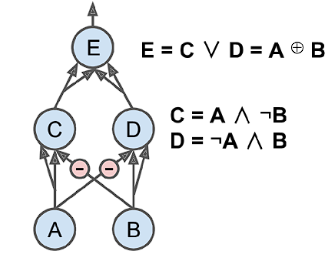

3. Why is it generally preferable to use a logistic regression classifier
rather than a classic perceptron (i.e., a single layer of threshold logic
units trained using the perceptron training algorithm)? How can you
tweak a perceptron to make it equivalent to a logistic regression
classifier?
> A classical Perceptron will converge only if the dataset is linearly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will generally converge to a reasonably good solution even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptron's activation function to the sigmoid activation function (or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier.

4. Why was the sigmoid activation function a key ingredient in training
the first MLPs?
> The sigmoid activation function was a key ingredient in training the first MLPs because its derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all.


5. Name three popular activation functions. Can you draw them?
> Popular activation functions include the step function, the sigmoid function, the hyperbolic tangent (tanh) function, and the Rectified Linear Unit (ReLU) function.
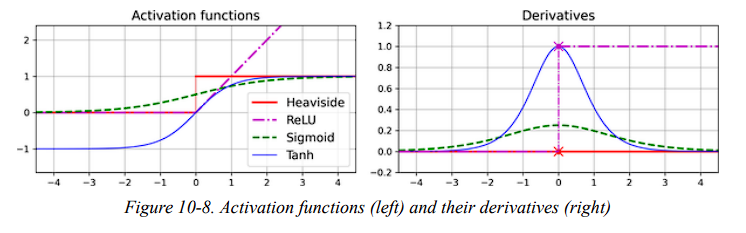


6. Suppose you have an MLP composed of one input layer with 10
passthrough neurons, followed by one hidden layer with 50 artificial
neurons, and finally one output layer with 3 artificial neurons. All
artificial neurons use the ReLU activation function.
a. What is the shape of the input matrix X?
b. What are the shapes of the hidden layer’s weight matrix W_h and
bias vector b_h ?
c. What are the shapes of the output layer’s weight matrix W_o and
bias vector b_o ?
d. What is the shape of the network’s output matrix Y?
e. Write the equation that computes the network’s output matrix Y
as a function of X, W_h , b_h , W_o , and b_o .

> * The shape of the input matrix X is m × 10, where m represents the training batch size.
> * The shape of the hidden layer's weight matrix Wh is 10 × 50, and the length of its bias vector bh is 50.
> * The shape of the output layer's weight matrix Wo is 50 × 3, and the length of its bias vector bo is 3.
> * The shape of the network's output matrix Y is m × 3.
> * Y = ReLU(ReLU(X Wh + bh) Wo + bo). Recall that the ReLU function just sets every negative number in the matrix to zero. Also note that when you are adding a bias vector to a matrix, it is added to every single row in the matrix, which is called broadcasting.

7. How many neurons do you need in the output layer if you want to
classify email into spam or ham? What activation function should you
use in the output layer? If instead you want to tackle MNIST, how
many neurons do you need in the output layer, and which activation
function should you use? What about for getting your network to
predict housing prices, as in Chapter 2?
> * To classify email into spam or ham, you just need one neuron in the output layer of a neural network—for example, indicating the probability that the email is spam. You would typically use the sigmoid activation function in the output layer when estimating a probability.

> * If instead you want to tackle MNIST, you need 10 neurons in the output layer, and you must replace the sigmoid function with the softmax activation function, which can handle multiple classes, outputting one probability per class.

> * If you want your neural network to predict housing prices like in Chapter 2, then you need one output neuron, using no activation function at all in the output layer. Note: when the values to predict can vary by many orders of magnitude, you may want to predict the logarithm of the target value rather than the target value directly. Simply computing the exponential of the neural network's output will give you the estimated value (since exp(log v) = v).


8. What is backpropagation and how does it work? What is the difference
between backpropagation and reverse-mode autodiff?
> * Backpropagation is a technique used to train artificial neural networks. It first computes the gradients of the cost function with regard to every model parameter (all the weights and biases), then it performs a Gradient Descent step using these gradients. This backpropagation step is typically performed thousands or millions of times, using many training batches, until the model parameters converge to values that (hopefully) minimize the cost function. To compute the gradients, backpropagation uses reverse-mode autodiff (although it wasn't called that when backpropagation was invented, and it has been reinvented several times).

> * Reverse-mode autodiff performs a forward pass through a computation graph, computing every node's value for the current training batch, and then it performs a reverse pass, computing all the gradients at once.

> *  Well, backpropagation refers to the whole process of training an artificial neural network using multiple backpropagation steps, each of which computes gradients and uses them to perform a Gradient Descent step. In contrast, reverse-mode autodiff is just a technique to compute gradients efficiently, and it happens to be used by backpropagation.

9. Can you list all the hyperparameters you can tweak in a basic MLP? If
the MLP overfits the training data, how could you tweak these
hyperparameters to try to solve the problem?
> Here is a list of all the hyperparameters you can tweak in a basic MLP: the number of hidden layers, the number of neurons in each hidden layer, and the activation function used in each hidden layer and in the output layer. In general, the ReLU activation function (or one of its variants; see Chapter 11) is a good default for the hidden layers. For the output layer, in general you will want the sigmoid activation function for binary classification, the softmax activation function for multiclass classification, or no activation function for regression. If the MLP overfits the training data, you can try reducing the number of hidden layers and reducing the number of neurons per hidden layer.

10. Train a deep MLP on the MNIST dataset (you can load it using
tf.keras.datasets.mnist.load_data()). See if you can get over
98% accuracy by manually tuning the hyperparameters. Try searching
for the optimal learning rate by using the approach presented in this
chapter (i.e., by growing the learning rate exponentially, plotting the
loss, and finding the point where the loss shoots up). Next, try tuning
the hyperparameters using Keras Tuner with all the bells and whistles
—save checkpoints, use early stopping, and plot learning curves using
TensorBoard.


In [2]:
import tensorflow as tf

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [4]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

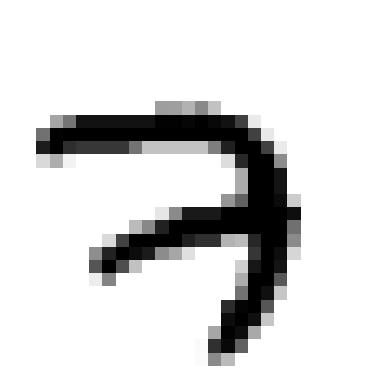

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_valid.shape,X_test.shape

((5000, 28, 28), (10000, 28, 28))

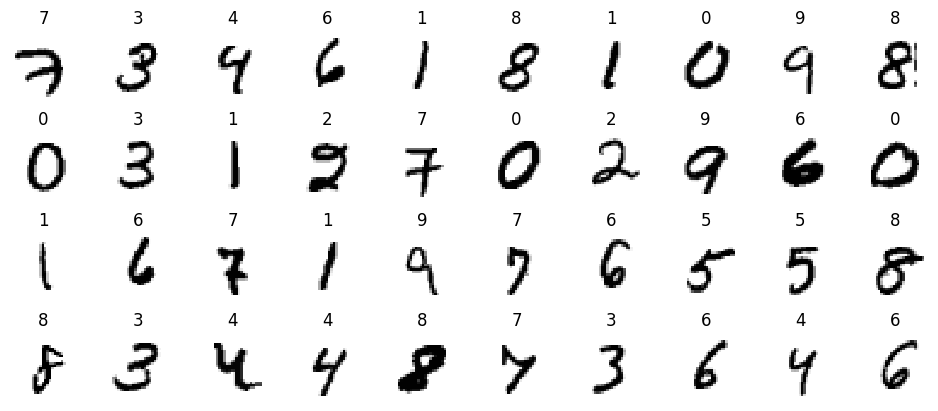

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [11]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs=None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [13]:
tf.keras.backend.clear_session()
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

C:\Users\haide\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [17]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4903 - loss: 118675759104.0000 - val_accuracy: 0.1126 - val_loss: 2.3911


We can now plot the loss as a functionof the learning rate:



Text(0, 0.5, 'Loss')

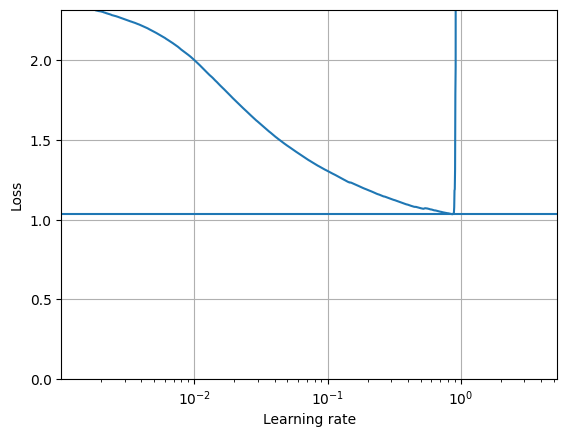

In [18]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [19]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [23]:
from pathlib import Path
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [24]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model.keras", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8724 - loss: 0.4091 - val_accuracy: 0.9704 - val_loss: 0.1016
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9700 - loss: 0.0979 - val_accuracy: 0.9752 - val_loss: 0.0786
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9825 - loss: 0.0589 - val_accuracy: 0.9752 - val_loss: 0.0799
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9856 - loss: 0.0447 - val_accuracy: 0.9762 - val_loss: 0.0812
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9722 - val_loss: 0.0926
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9913 - loss: 0.0264 - val_accuracy: 0.9716 - val_loss: 0.1081
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9726 - val_loss: 0.1101
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9928 - loss

In [25]:
model = tf.keras.models.load_model("my_mnist_model.keras") # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9711 - loss: 0.0894


[0.07630302757024765, 0.9761000275611877]

In [26]:
%tensorboard --logdir=./my_mnist_logs

UsageError: Line magic function `%tensorboard` not found.
